In [ ]:
#importind essential modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df=pd.read_csv('abc.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [6]:
# Correct the data in the "height" column
df['Height'] = np.random.randint(150, 181, size=len(df))


In [7]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,171,180,Texas,7730337.0,160
1,Jae Crowder,Boston Celtics,99,SF,25,165,235,Marquette,6796117.0,180
2,John Holland,Boston Celtics,30,SG,27,165,205,Boston University,NaN,150
3,R.J. Hunter,Boston Celtics,28,SG,22,170,185,Georgia State,1148640.0,162
4,Jonas Jerebko,Boston Celtics,8,PF,29,163,231,NaN,5000000.0,176
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,170,203,Butler,2433333.0,168
454,Raul Neto,Utah Jazz,25,PG,24,163,179,NaN,900000.0,179
455,Tibor Pleiss,Utah Jazz,21,C,26,169,256,NaN,2900000.0,150
456,Jeff Withey,Utah Jazz,24,C,26,154,231,Kansas,947276.0,164


In [11]:
#Determine the distribution of employees across each team and calculate the percentage split
team_distribution = df['Team'].value_counts(normalize=True) * 100
team_distribution

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

In [12]:
 #Segregate employees based on their positions within the company
position_distribution = df['Position'].value_counts()
position_distribution

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [14]:
#Identify the predominant age group among employees
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
predominant_age_group = df['Age_group'].value_counts().idxmax()
predominant_age_group

'20-29'

In [16]:
#Discover which team and position have the highest salary expenditure
highest_salary_team = df.groupby('Team')['Salary'].sum().idxmax()
highest_salary_position = df.groupby('Position')['Salary'].sum().idxmax()
highest_salary_position
highest_salary_team

'Cleveland Cavaliers'

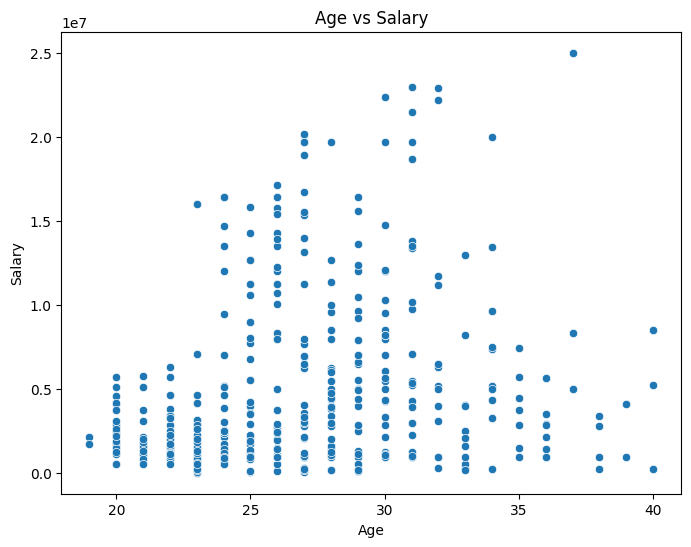

In [17]:
#Investigate if there's any correlation between age and salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

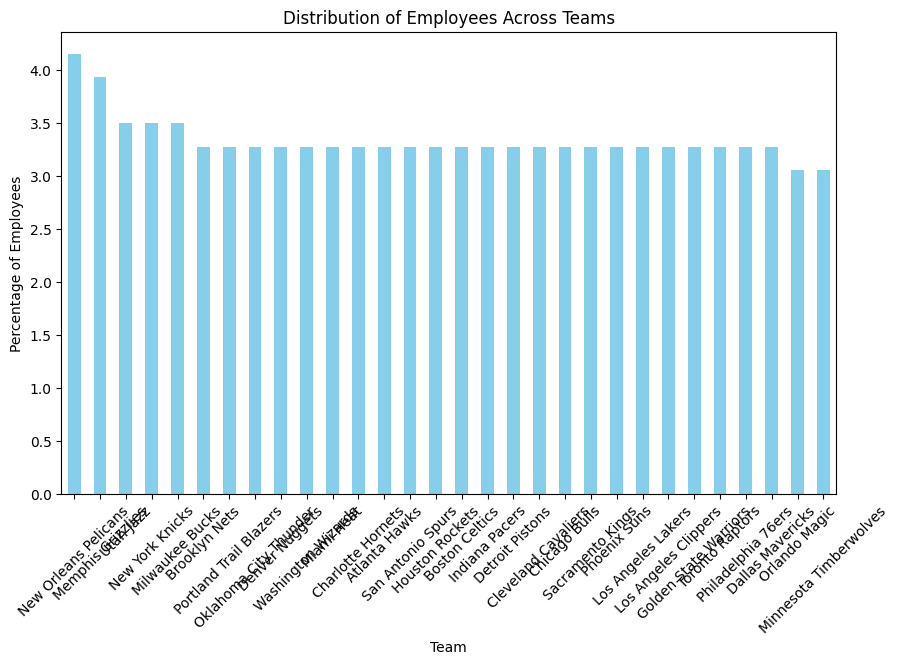

In [18]:
#Distribution of employees across each team
plt.figure(figsize=(10, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Percentage of Employees')
plt.xticks(rotation=45)
plt.show()

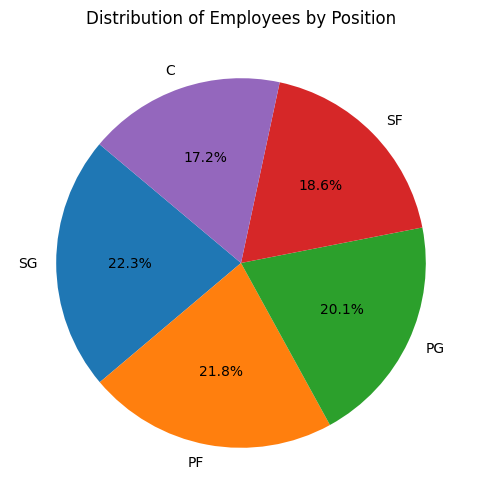

In [19]:

plt.figure(figsize=(10, 6))
position_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees by Position')
plt.ylabel('')
plt.show()


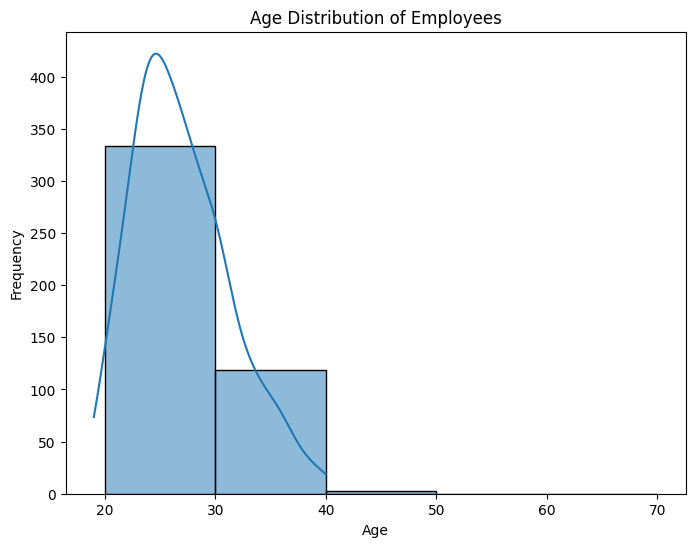

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=age_bins, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [22]:
print("Data Story:")
print("1. Distribution of Employees Across Teams:")
print(team_distribution)
print("\n2. Segregation of Employees Based on Positions:")
print(position_distribution)
print("\n3. Predominant Age Group Among Employees:", predominant_age_group)
print("\n4. Team with the Highest Salary Expenditure:", highest_salary_team)
print("   Position with the Highest Salary Expenditure:", highest_salary_position)
print("\n5. Correlation between Age and Salary:")
print("   There seems to be a slight positive correlation between age and salary, indicating that older employees tend to have higher salaries.")

Data Story:
1. Distribution of Employees Across Teams:
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.27